In [3]:
%pylab inline
%pylab inline
from wrftools import utils
import numpy as np
import xarray
import cartopy.crs as ccrs
from cartopy.examples.arrows import sample_data
import wrftools
import cartopy.feature as cfeature 
#from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import shapely.geometry as sgeom
import cartopy.io.shapereader as shpreader
from ipywidgets import interact
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from mpl_toolkits.basemap import Basemap

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [6]:
#wrfdata=xarray.open_dataset('/oasis/scratch/jmulhol2/temp_project/WRFV3/test/Blizzard-Rad-1/wrfout_d02_2016-02-24_00:00:00')

#wrfdata=xarray.open_dataset('/oasis/scratch/jmulhol2/temp_project/WRFV3/test/Blizzard-Rad-4/wrfout_d02_2016-02-24_00:00:00')

wrfdata=xarray.open_dataset('/oasis/scratch/snesbitt/temp_project/WRFV3_real_3.7/test/blizzard/wrfout_d02_2016-02-24_00:00:00')

In [7]:
wrfdata

<xarray.Dataset>
Dimensions:                (Time: 49, bottom_top: 49, bottom_top_stag: 50, soil_layers_stag: 4, south_north: 99, south_north_stag: 100, west_east: 99, west_east_stag: 100)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 35.403 ...
    XLONG                  (Time, south_north, west_east) float32 -94.7782 ...
    XTIME                  (Time) datetime64[ns] 2016-02-24 ...
    XLAT_U                 (Time, south_north, west_east_stag) float32 35.4026 ...
    XLONG_U                (Time, south_north, west_east_stag) float32 -94.8278 ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 35.3626 ...
    XLONG_V                (Time, south_north_stag, west_east) float32 -94.7777 ...
  * Time                   (Time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...
  * bottom_top             (bottom_top) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 ...
  * bottom_top_stag        (bottom_top_stag) int64 0 1 2 3 4 5 6 7 8 9 10 11 ...
  * s

<xarray.DataArray 'XTIME' (Time: 49)>
array(['2016-02-23T16:00:00.000000000-0800',
       '2016-02-23T16:30:36.000120000-0800',
       '2016-02-23T17:00:18.000180000-0800',
       '2016-02-23T17:30:00.000480000-0800',
       '2016-02-23T18:00:36.000360000-0800',
       '2016-02-23T18:30:18.000180000-0800',
       '2016-02-23T19:00:00.000900000-0800',
       '2016-02-23T19:30:36.000360000-0800',
       '2016-02-23T20:00:18.001080000-0800',
       '2016-02-23T20:30:00.000000000-0800',
       '2016-02-23T21:00:36.000360000-0800',
       '2016-02-23T21:30:18.001080000-0800',
       '2016-02-23T22:00:00.001860000-0800',
       '2016-02-23T22:30:36.000360000-0800',
       '2016-02-23T23:00:18.001080000-0800',
       '2016-02-23T23:30:00.001860000-0800',
       '2016-02-24T00:00:36.002220000-0800',
       '2016-02-24T00:30:18.001080000-0800',
       '2016-02-24T01:00:00.000000000-0800',
       '2016-02-24T01:30:36.002220000-0800',
       '2016-02-24T02:00:18.002940000-0800',
       '2016-02-2

/home/snesbitt/anaconda2/lib/python2.7/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


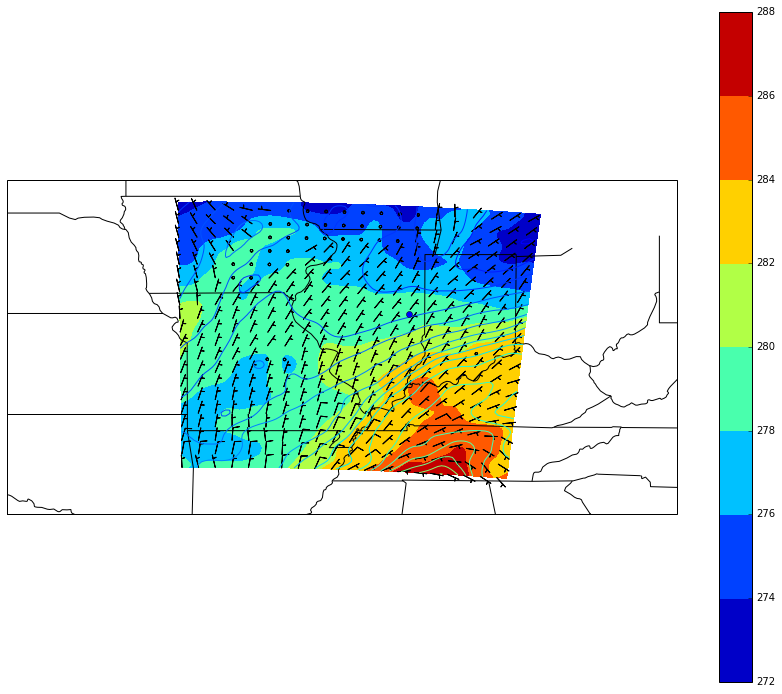

In [8]:
U_unstag=wrftools.utils.wrf_unstagger(wrfdata['U'].values,'U')
np.shape(U_unstag)
V_unstag=wrftools.utils.wrf_unstagger(wrfdata['V'].values,'V')
np.shape(V_unstag)



# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',facecolor='none')

plt.figure(figsize=(15,12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-100, -80, 34, 44])
ax.coastlines()

plt.contourf(wrfdata['XLONG'].values[0,:,:],
             wrfdata['XLAT'].values[0,:,:],
             wrfdata['T2'].values[0,:,:],transform=ccrs.PlateCarree())
plt.colorbar()
plt.barbs(wrfdata['XLONG'].values[0,::5,::5],
         wrfdata['XLAT'].values[0,::5,::5],
         U_unstag[0,0,::5,::5],V_unstag[0,0,::5,::5],transform=ccrs.PlateCarree(),
         sizes=dict(emptybarb=0.1, spacing=0.2, height=0.5),length=5)
plt.contour(wrfdata['XLONG'].values[0,:,:],
             wrfdata['XLAT'].values[0,:,:],
           1000.*wrfdata['Q2'].values[0,:,:],transform=ccrs.PlateCarree(),levels=np.arange(0,20,.5))
ax.add_feature(states_provinces, edgecolor='black')

CU_lon, CU_lat = -88, 40

plt.plot([CU_lon], [CU_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )


print(wrfdata['XTIME'])

/home/snesbitt/anaconda2/lib/python2.7/site-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces_lines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/home/snesbitt/anaconda2/lib/python2.7/site-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/10m/physical/ne_10m_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


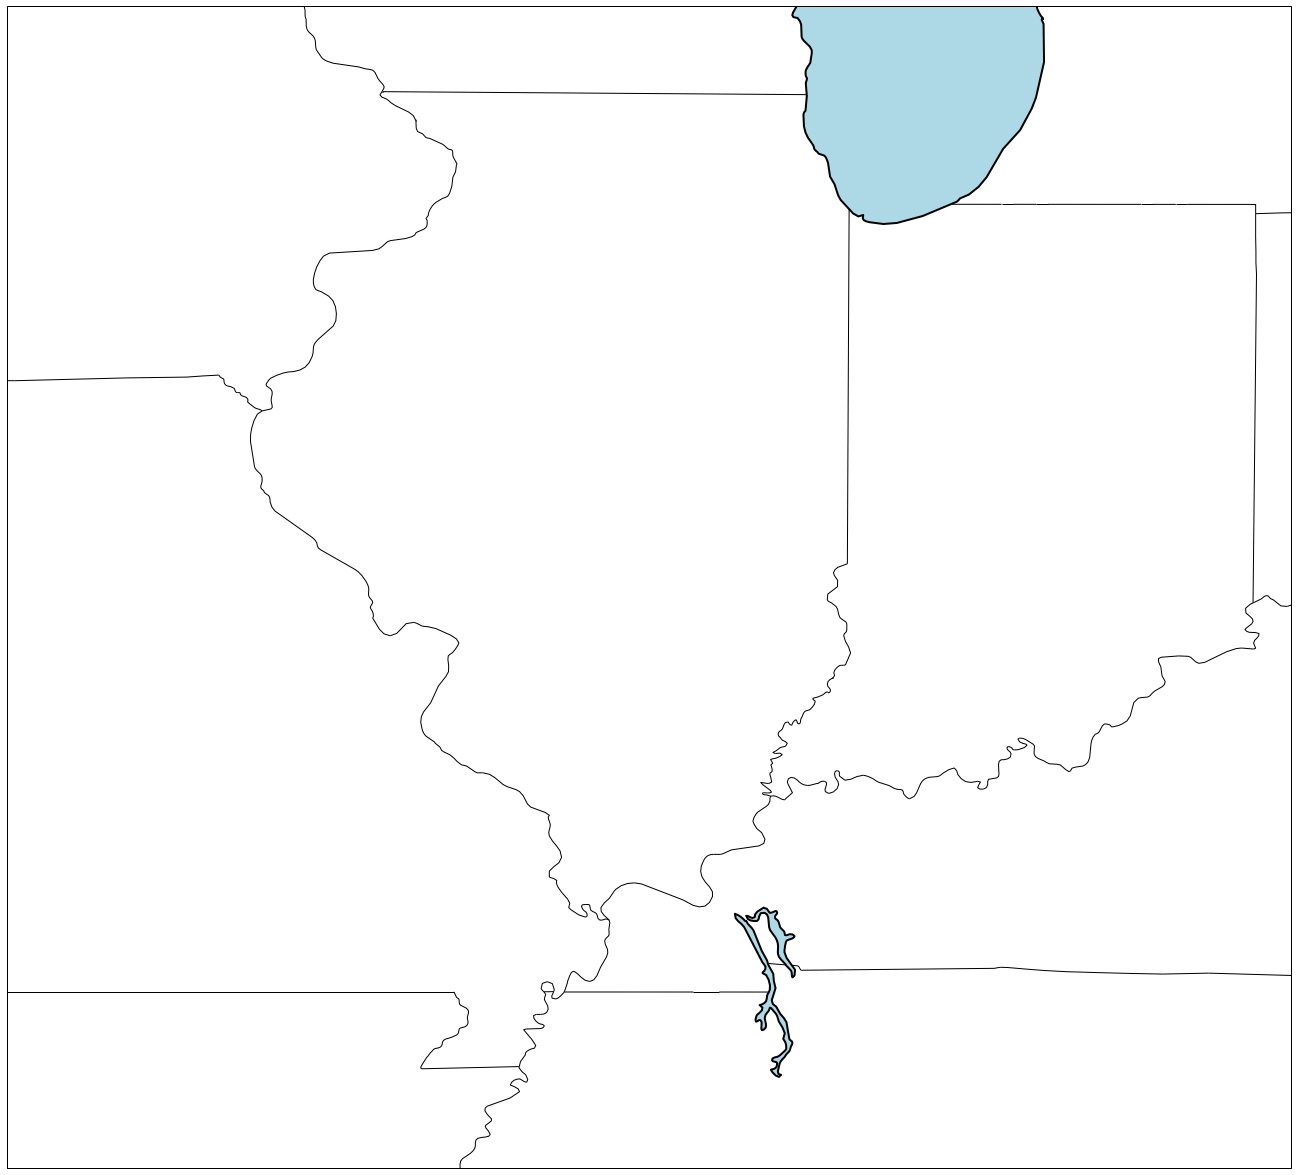

In [9]:
# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')

lakes = cfeature.NaturalEarthFeature(
    category='physical',
    name='lakes',
    scale='10m',
    facecolor='lightblue')

plt.figure(figsize=(23,21))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([np.min(wrfdata['XLONG'].values)+1.75,np.max(wrfdata['XLONG'].values)-0.5,
               np.min(wrfdata['XLAT'].values[0,:,:]+0.25),np.max(wrfdata['XLAT'].values[0,:,:]-0.25)])
ax.coastlines()

ax.add_feature(states_provinces, edgecolor='black')
ax.add_feature(lakes, edgecolor='black',lw=2)

(array([60]), array([62]))
[[ 40.25835037]
 [ 40.42008972]]
[[-88.8293457 ]
 [-88.63146973]]


(0, 360)

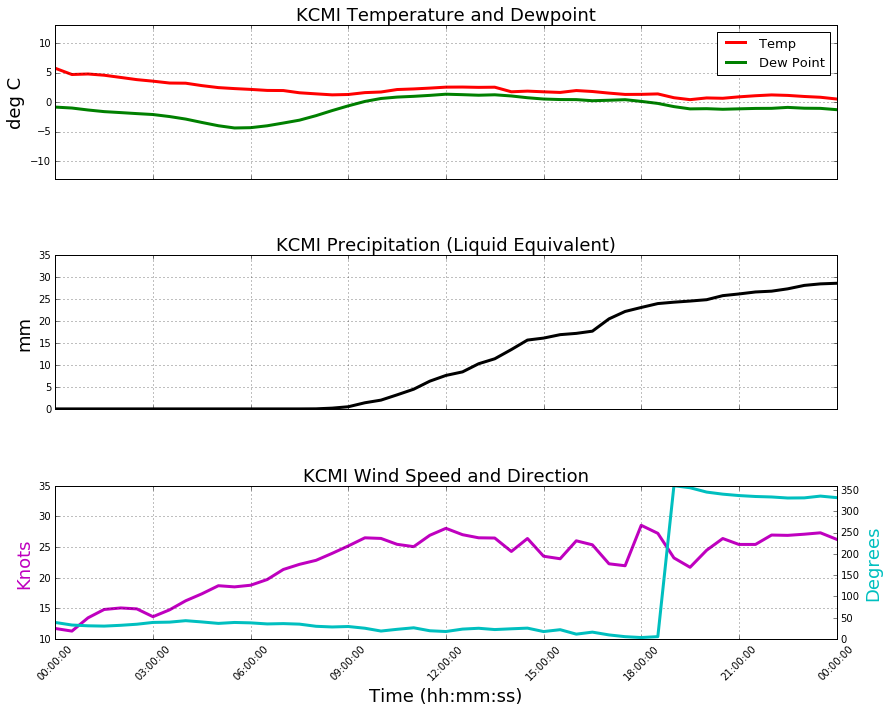

In [10]:
## Surface Meteograms at Champaign (hourly) ## 
# Calculating variables 
# Champaign's lat/long = 40.115, -88.2728

__all__ = ['wrf_theta', 'wrf_temp', 'wrf_rh', 'wrf_dewp']

def xy_to_gridpoint(x,y,gridx,gridy):
    distance = ( gridx - x )**2 + ( gridy - y )**2  
    idx = np.where( distance == distance.min())
    return idx

a = -88.3 #lon of champaign 
b = 40.1 #lat of champaign 
c =wrfdata['XLONG'].values[0,:,:]
d = wrfdata['XLAT'].values[0,:,:]
index= xy_to_gridpoint(a,b,c,d)
print(index)
print(wrfdata['XLAT'].values[0,index,0])
print(wrfdata['XLONG'].values[0,0,index])

########################
def wrf_theta( T ):

    return T + 300
def wrf_temp( THETA, PRES ):
 
    assert THETA.shape == PRES.shape 
    K = 0.2854
    return THETA * ( PRES / 1000 )**K

def wrf_rh( TEMP, PRES, QVAPOR ):
    assert TEMP.shape == PRES.shape == QVAPOR.shape 
    e_0 = 6.1173 ## mb
    t_0 = 273.16 ## K
    Rv = 461.50 ## J K-1 Kg-1
    Lv_0 = 2.501 * 10**6 ## J Kg-1
    K1 = Lv_0 / Rv ## K 
    K2 = 1 / t_0 ## K-1
    K3 = 1 / TEMP ## K-1
    ## Clausius Clapeyron Equation
    e_s = e_0 * numpy.exp( K1 * ( K2 - K3 ) )
    w_s = ( 0.622 * e_s ) / ( PRES - e_s )
    return ( QVAPOR / w_s ) * 100

def wrf_dewp( TEMP, PRES, QVAPOR ):
    ## constants for the Clausius Clapeyron Equation
    e_0 = 6.1173 ## mb
    t_0 = 273.16 ## K
    Rv = 461.50 ## J K-1 Kg-1
    Lv_0 = 2.501 * 10**6 ## J Kg-1
    ## Compute portions of the equation
    K1 = Lv_0 / Rv ## K 
    K2 = 1 / t_0 ## K-1
    K3 = 1 / TEMP ## K-1
    ## Clausius Clapeyron Equation
    e_s = e_0 * numpy.exp( K1 * ( K2 - K3 ) ) ## mb
    ## get saturation mixing ratio for RH
    w_s = ( 0.622 * e_s ) / ( PRES - e_s )
    rh = ( QVAPOR / w_s ) * 100
    ## back out the vapor pressure
    e = ( rh / 100 ) * e_s ## mb
    ## compute individual terms when solving the equation for Td
    K1_inv = Rv / Lv_0
    K4 = numpy.log( e / e_0 )
    term1 = K2 - (K1_inv * K4)
    return 1 / term1

####################
P = wrfdata['P'] + wrfdata['PB']
P.attrs['long_name'] = 'Total pressure'
P.attrs['units'] = 'Pa'
T = wrfdata['T'] 
T.attrs['long_name'] = '2m Temp'
T.attrs['units'] = 'K'
Q = wrfdata['QVAPOR'] 
Q.attrs['long_name'] = 'Specific Humidity'
Q.attrs['units'] = 'kg/kg'

#get surface data 
P_surf = P[:,0,index[0],index[1]]/100
T_surf = T[:,0,index[0],index[1]]
Q_surf = Q[:,0,index[0],index[1]]

THETA = wrf_theta(T_surf)
#print(THETA[:,:,:])
TEMP = wrf_temp(THETA,P_surf)
#print(P_surf[:,:,:])
#print(TEMP[:,:,:])

RH2 = wrf_rh(TEMP,P_surf,Q_surf)

Td = (wrf_dewp(TEMP,P_surf,Q_surf))-273.15

## Plotting Meteograms ##
# Temperature
# Dewpoint
# Precipitation (RAIN + RAINNC)
# Windspeeds
# Wind Direction 

Temp2m = (wrfdata['T2'].values[:,index[0],index[1]])-273.15

Precip = (wrfdata['RAINC'].values[:,index[0],index[1]] + wrfdata['RAINNC'].values[:,index[0],index[1]]) 

U_wind = (wrfdata['U10'].values[:,index[0],index[1]])*1.94384
V_wind = (wrfdata['V10'].values[:,index[0],index[1]])*1.94384
time = wrfdata['XTIME']
wind_speed = sqrt(U_wind**2 + V_wind**2) 
#print(U_wind)
#print(V_wind)

r2d = 45.0/arctan(1.0)
wind_direction_2 = arctan2(U_wind, V_wind) * r2d +180
#wind_direction_2 = (180/pi * wind_direction) + 180
#print(wind_direction_2)

f,(ax1,ax2,ax3)  = plt.subplots(3, sharex=True, figsize=(14,11))
plt.subplots_adjust(hspace=.5)
plt.xticks(rotation =45)

ax1.plot(time, Temp2m,color='r', lw = 3)
ax1.plot(time, Td[:,0,0],color='g', lw = 3)
ax1.grid(True)
ax1.set_ylim([-13, 13])

ax1.legend(['Temp','Dew Point'],loc='upper right',prop={'size':13})
ax1.set_title('KCMI Temperature and Dewpoint', fontsize=18)
ax1.set_ylabel('deg C', fontsize = 18)


ax2.plot(time, Precip,color='k', lw = 3)
ax2.grid(True)
ax2.set_title('KCMI Precipitation (Liquid Equivalent)', fontsize= 18)
ax2.set_ylabel('mm', fontsize = 18)
ax2.set_ylim([0, 35])

#print(wind_speed.shape)
#print(wind_direction.shape)

#barbs = plt.barbs((wrfdata['U10'].values[:,index[0],index[1]])*1.94384, (wrfdata['V10'].values[:,index[0],index[1]])*1.94384)
ax4 = ax3.twinx()
ax3.plot(time, wind_speed,color='m', lw = 3)
ax3.grid(True)
ax3.set_title('KCMI Wind Speed and Direction', fontsize = 18)
ax3.set_ylabel('Knots',color='m', fontsize = 18)
ax4.plot(time,wind_direction_2,color='c', lw = 3 )
ax4.set_ylabel('Degrees',color='c', fontsize = 18)
ax3.set_xlabel('Time (hh:mm:ss)', fontsize = 18)
ax3.set_ylim([10,35])
ax4.set_ylim([0,360])

In [12]:
## Looped Maps ##
# Surface precipitation

rainc = (wrfdata['RAINC'])
rainnc = (wrfdata['RAINNC'])
total_rain = (wrfdata['RAINC']+wrfdata['RAINNC']) / (25.4)

def browse_images(total_rain):
    t = 49
    def plot_total_rain(i):
        plt.figure(figsize=(14,11))
        #plt.figure()
        ax = plt.axes([0, 0, 1, 1],
                      projection=ccrs.PlateCarree())  #LambertConformal

        ax.set_extent([-94.5, -84.5, 35.5, 42.5], ccrs.Geodetic())
     
        shapename = 'admin_1_states_provinces_lakes_shp'
        states_shp = shpreader.natural_earth(resolution='110m',
                                             category='cultural', name=shapename)
        
        ax.background_patch.set_visible(False)
        ax.outline_patch.set_visible(False)
        #ax.drawcounties()
        
        plev = np.arange(0.4,2.9,0.3) 
        plt.contourf(wrfdata['XLONG'].values[i,:,:],
                     wrfdata['XLAT'].values[i,:,:],
                     total_rain[i,:,:], plev, transform=ccrs.PlateCarree(),cmap='jet')
    
        #plt.colorbar(orientation='horizontal',label = 'mm')
        #font_size = 18
        
        
        cb = plt.colorbar(orientation='horizontal',label = 'mm')
        cb.set_label("inches", size=28)
        font_size = 18 # Adjust as appropriate.
        cb.ax.tick_params(labelsize=font_size)


        plt.title('Surface Precipitation (liquid equivalent; in)', fontsize=28)
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabels_top = False
        gl.ylabels_right = False
        gl.xlabel_style = {'size': 14, 'color': 'black'}
        gl.ylabel_style = {'size': 14, 'color': 'black'}

        for state in shpreader.Reader(states_shp).geometries():

            facecolor = ['None']
            edgecolor = 'black'

            ax.add_geometries([state], ccrs.PlateCarree(),
                              facecolor=facecolor, edgecolor=edgecolor)
            
        CU_lon, CU_lat = -88.3, 40.1

        plt.plot([CU_lon], [CU_lat],
         color='magenta', linewidth=10, markersize=22, marker='o',
         transform=ccrs.Geodetic(),
         )

    interact(plot_total_rain, i=(0,t-1))

In [ ]:
    browse_images(total_rain)

In [ ]:
## Looped Maps ##
# Surface precipitation

total_snow_depth = (wrfdata['SNOWNC'])*0.0393701 

#print(wrfdata['SNOWNC'])

def browse_images(total_snow_depth):
    t = 49
    def plot_total_snow_depth(i):
        plt.figure(figsize=(14,11))
        #plt.figure()
        ax = plt.axes([0, 0, 1, 1],
                      projection=ccrs.PlateCarree())  #LambertConformal

        ax.set_extent([-94.5, -84.5, 35.5, 42.5], ccrs.Geodetic())
     
        shapename = 'admin_1_states_provinces_lakes_shp'
        states_shp = shpreader.natural_earth(resolution='110m',
                                             category='cultural', name=shapename)
        
        ax.background_patch.set_visible(False)
        ax.outline_patch.set_visible(False)
        #ax.drawcounties()
        
        plev = np.arange(0.1,3.0,0.1) 
        plt.contourf(wrfdata['XLONG'].values[i,:,:],
                     wrfdata['XLAT'].values[i,:,:],
                     total_snow_depth[i,:,:], plev, transform=ccrs.PlateCarree(),cmap='jet')
    
        #plt.colorbar(orientation='horizontal',label = 'mm')
        #font_size = 18
        
        
        cb = plt.colorbar(orientation='horizontal',label = 'mm')
        cb.set_label("inches", size=28)
        font_size = 18 # Adjust as appropriate.
        cb.ax.tick_params(labelsize=font_size)


        plt.title('Accumulated Total Grid Scale Snow and Ice (in)', fontsize=28)
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabels_top = False
        gl.ylabels_right = False
        gl.xlabel_style = {'size': 14, 'color': 'black'}
        gl.ylabel_style = {'size': 14, 'color': 'black'}

        for state in shpreader.Reader(states_shp).geometries():

            facecolor = ['None']
            edgecolor = 'black'

            ax.add_geometries([state], ccrs.PlateCarree(),
                              facecolor=facecolor, edgecolor=edgecolor)
            
        CU_lon, CU_lat = -88.3, 40.1

        plt.plot([CU_lon], [CU_lat],
         color='magenta', linewidth=10, markersize=22, marker='o',
         transform=ccrs.Geodetic(),
         )

    interact(plot_total_snow_depth, i=(0,t-1))

In [ ]:
    browse_images(total_snow_depth)

In [ ]:
P_input = wrfdata['P'].values
PB_input = wrfdata['PB'].values
T_input = wrfdata['T'].values

U_unstag=wrftools.utils.wrf_unstagger(wrfdata['U'].values,'U')
np.shape(U_unstag)
V_unstag=wrftools.utils.wrf_unstagger(wrfdata['V'].values,'V')
np.shape(V_unstag)

#HGT_input = wrfdata['HGT'].values
# calculating pressure and potential temp
Pres_input = wrftools.utils.wrf_pressure(P_input, PB_input)
Theta_input = wrftools.utils.wrf_theta(T_input)
#Hght_input = wrftools.utils.wrf_hght(HGT_input)
# reverse vertical order for interprete function 
Pres_input = Pres_input[:,::-1,:,:]
Theta_input = Theta_input[:,::-1,:,:]
#Hght_input = Hght_input[:,::-1,:,:]

# define vertical levels to inperolate to
interplevels = numpy.asarray([1000, 950, 900, 850, 800, 750, 700, 650, 600, 550, 500, 450, 400, 350, 300, 250, 200,
                             150, 100, 50])

print(interplevels)

K = 0.2854
TEMP = (Theta_input * (Pres_input/1000)**K)-273.15

#U_unstag=wrftools.utils.wrf_unstagger(wrfdata['U'].values, 'U')
#V_unstag=wrftools.utils.wrf_unstagger(wrfdata['V'].values, 'V')

#Theta_out = wrftools.interp.wrf_to_pres(Theta_input, Pres_input, interplevels)
T_final = wrftools.interp.wrf_to_pres(TEMP, Pres_input, interplevels)

#U_final = wrftools.interp.wrf_to_pres(wrfdata['U'], Pres_input, interplevels)
#V_final = wrftools.interp.wrf_to_pres(wrfdata['V'], Pres_input, interplevels)

U_final = wrftools.interp.wrf_to_pres(U_unstag, Pres_input, interplevels)
V_final = wrftools.interp.wrf_to_pres(V_unstag, Pres_input, interplevels)


print(U_final)
#H_final = wrftools.interp.wrf_to_pres(HGT, Hght_input, interplevels)

#print(U_final.shape)
#print(U_final[0,:,1,1])

#print(H_final.shape)
#print(H_final[0,:,1,1])

In [ ]:
# 850 hPa Temperature and Wind
    
temp = T_final

def browse_images(temp):
    t = 49
    def plot_temp(i):
        plt.figure(figsize=(14,11))
        ax = plt.axes([0, 0, 1, 1],
                      projection=ccrs.PlateCarree())  #LambertConformal

        ax.set_extent([-94.5, -84.5, 35.5, 42.5], ccrs.Geodetic())

        shapename = 'admin_1_states_provinces_lakes_shp'
        states_shp = shpreader.natural_earth(resolution='110m',
                                             category='cultural', name=shapename)

        ax.background_patch.set_visible(False)
        ax.outline_patch.set_visible(False)

        
        plev = np.arange(0.5,50,.5) 
        #plt.contourf(wrfdata['XLONG'].values[i,:,:],
        #             wrfdata['XLAT'].values[i,:,:],
        #             total_rain[i,:,:], plev, transform=ccrs.PlateCarree())
        plt.contourf(wrfdata['XLONG'].values[i,:,:],
             wrfdata['XLAT'].values[i,:,:],
             T_final[i,3,:,:],alpha = 0.8, transform=ccrs.PlateCarree(),levels=np.arange(-10,15,2))
        cb = plt.colorbar(orientation='horizontal',label = 'mm')
        cb.set_label("deg C", size=28)
        font_size = 18 # Adjust as appropriate.
        cb.ax.tick_params(labelsize=font_size)
        
        #plt.barbs(wrfdata['XLONG'].values[i,::5,::5],
        #          wrfdata['XLAT'].values[i,::5,::5],
        #          U_final[i,3,::5,::5],V_final[i,3,::5,::5],transform=ccrs.PlateCarree())
        
        plt.barbs(wrfdata['XLONG'].values[i,::5,::5],
         wrfdata['XLAT'].values[i,::5,::5],
         U_unstag[i,21,::5,::5]*1.94384,V_unstag[i,21,::5,::5]*1.94384,transform=ccrs.PlateCarree(),
         sizes=dict(emptybarb=0.1, spacing=0.2, height=0.3),length=7)
        
        #plt.contour(wrfdata['XLONG'].values[i,:,:],
        #wrfdata['XLAT'].values[i,:,:],
        #wrfdata['HGT'].values[i,:,:], colors='k', linewidths=4,transform=ccrs.PlateCarree(),levels=[150,300,450])
        #print(wrfdata['HGT'].values[i,:,:])
         
        plt.title('850 hPa Temperature (deg C) and Wind Barbs (knots)', fontsize=28)
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=3, color='w', alpha=0.75, linestyle='--')
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabels_top = False
        gl.ylabels_right = False
        gl.xlabel_style = {'size': 14, 'color': 'black'}
        gl.ylabel_style = {'size': 14, 'color': 'black'}

        for state in shpreader.Reader(states_shp).geometries():

            facecolor = ['None']
            edgecolor = 'black'

            ax.add_geometries([state], ccrs.PlateCarree(),
                              facecolor=facecolor, edgecolor=edgecolor)
            
        CU_lon, CU_lat = -88.3, 40.1

        plt.plot([CU_lon], [CU_lat],
        color='magenta', linewidth=10, markersize=22, marker='o',
        transform=ccrs.Geodetic(),
         )

    interact(plot_temp, i=(0,t-1))

In [ ]:
browse_images(temp)

In [ ]:
## Surface Meteograms at Champaign (hourly) ## 
# Calculating variables 
# Champaign -> 40.115, -88.2728

__all__ = ['wrf_theta', 'wrf_temp', 'wrf_rh', 'wrf_dewp']

def xy_to_gridpoint(x,y,gridx,gridy):
    distance = ( gridx - x )**2 + ( gridy - y )**2  
    idx = np.where( distance == distance.min())
    return idx

a = -88.3 #lat and lon of champaign 
b = 40.1 
c =wrfdata['XLONG'].values[0,:,:]
d = wrfdata['XLAT'].values[0,:,:]
index= xy_to_gridpoint(a,b,c,d)
print(index)
print(wrfdata['XLAT'].values[0,index,0])
print(wrfdata['XLONG'].values[0,0,index])

########################
def wrf_theta( T ):

    return T + 300
def wrf_temp( THETA, PRES ):
 
    assert THETA.shape == PRES.shape 
    K = 0.2854
    return THETA * ( PRES / 1000 )**K

def wrf_rh( TEMP, PRES, QVAPOR ):
    assert TEMP.shape == PRES.shape == QVAPOR.shape 
    e_0 = 6.1173 ## mb
    t_0 = 273.16 ## K
    Rv = 461.50 ## J K-1 Kg-1
    Lv_0 = 2.501 * 10**6 ## J Kg-1
    K1 = Lv_0 / Rv ## K 
    K2 = 1 / t_0 ## K-1
    K3 = 1 / TEMP ## K-1
    ## Clausius Clapeyron Equation
    e_s = e_0 * numpy.exp( K1 * ( K2 - K3 ) )
    w_s = ( 0.622 * e_s ) / ( PRES - e_s )
    return ( QVAPOR / w_s ) * 100

#def wrf_dewp( TEMP, PRES, QVAPOR ):
#    ## constants for the Clausius Clapeyron Equation
#    e_0 = 6.1173 ## mb
#    t_0 = 273.16 ## K
#    Rv = 461.50 ## J K-1 Kg-1
#    Lv_0 = 2.501 * 10**6 ## J Kg-1
 #   ## Compute portions of the equation
#    K1 = Lv_0 / Rv ## K 
#    K2 = 1 / t_0 ## K-1
#    K3 = 1 / TEMP ## K-1
 #   ## Clausius Clapeyron Equation
#    e_s = e_0 * numpy.exp( K1 * ( K2 - K3 ) ) ## mb
#    ## get saturation mixing ratio for RH
#    w_s = ( 0.622 * e_s ) / ( PRES - e_s )
#    rh = ( QVAPOR / w_s ) * 100
#    ## back out the vapor pressure
#    e = ( rh / 100 ) * e_s ## mb
#    ## compute individual terms when solving the equation for Td
#    K1_inv = Rv / Lv_0
#    K4 = numpy.log( e / e_0 )
#    term1 = K2 - (K1_inv * K4)
#    return 1 / term1

####################
P = wrfdata['P'] + wrfdata['PB']
P.attrs['long_name'] = 'Total pressure'
P.attrs['units'] = 'Pa'
T = wrfdata['T'] 
T.attrs['long_name'] = '2m Temp'
T.attrs['units'] = 'K'
Q = wrfdata['QVAPOR'] 
Q.attrs['long_name'] = 'Specific Humidity'
Q.attrs['units'] = 'kg/kg'
W = wrfdata['W'] 
W.attrs['long_name'] = 'Omega'
W.attrs['units'] = 'm/s'

#get surface data 
P_cross = P[:,:,index[0],index[1]]/100
T_cross = T[:,:,index[0],index[1]]
Q_cross = Q[:,:,index[0],index[1]]
W_cross = W[:,:,index[0],index[1]]
#P_final = P_f[:,:,index[0],index[1]]

THETA = wrf_theta(T_cross)
#print(THETA[:,:,:])
TEMP = wrf_temp(THETA,P_cross)
#print(P_surf[:,:,:])
#print(TEMP[:,:,:])

RH2 = wrf_rh(TEMP,P_cross,Q_cross)
np.squeeze(RH2, axis=(2,)).shape

#OMEGA = wrf_omega(P_cross)
#np.squeeze(OMEGA, axis=(2,)).shape

#Td = wrf_dewp(TEMP,P_cross,Q_cross)

In [ ]:
## Time-Height Diagram (KCMI) ##
# RH(colored), Omega (coutoured), Winds
#add extra dimention : 

Tempall = wrfdata['T'].values[:,:,index[0],index[1]]

#Precipall = wrfdata['RAINC'].values[:,:,index[0],index[1]] + wrfdata['RAINNC'].values[:,:,index[0],index[1]]

U_wind_all = wrfdata['U'].values[:,:,index[0],index[1]]
V_wind_all = wrfdata['V'].values[:,:,index[0],index[1]]
time = wrfdata['XTIME']
height = wrfdata['HGT']

In [ ]:
print(time.shape)
print(height.shape)

print(W_cross.shape)
print(np.squeeze(W_cross, axis=(2,)).shape)

print(RH2.shape)
print(np.squeeze(RH2, axis=(2,)).shape)

print(U_wind_all.shape)
print(np.squeeze(U_wind_all, axis=(2,)).shape)

print(V_wind_all.shape)
print(np.squeeze(V_wind_all, axis=(2,)).shape)

202.160324192
-125.037355356


ValueError: all the input array dimensions except for the concatenation axis must match exactly

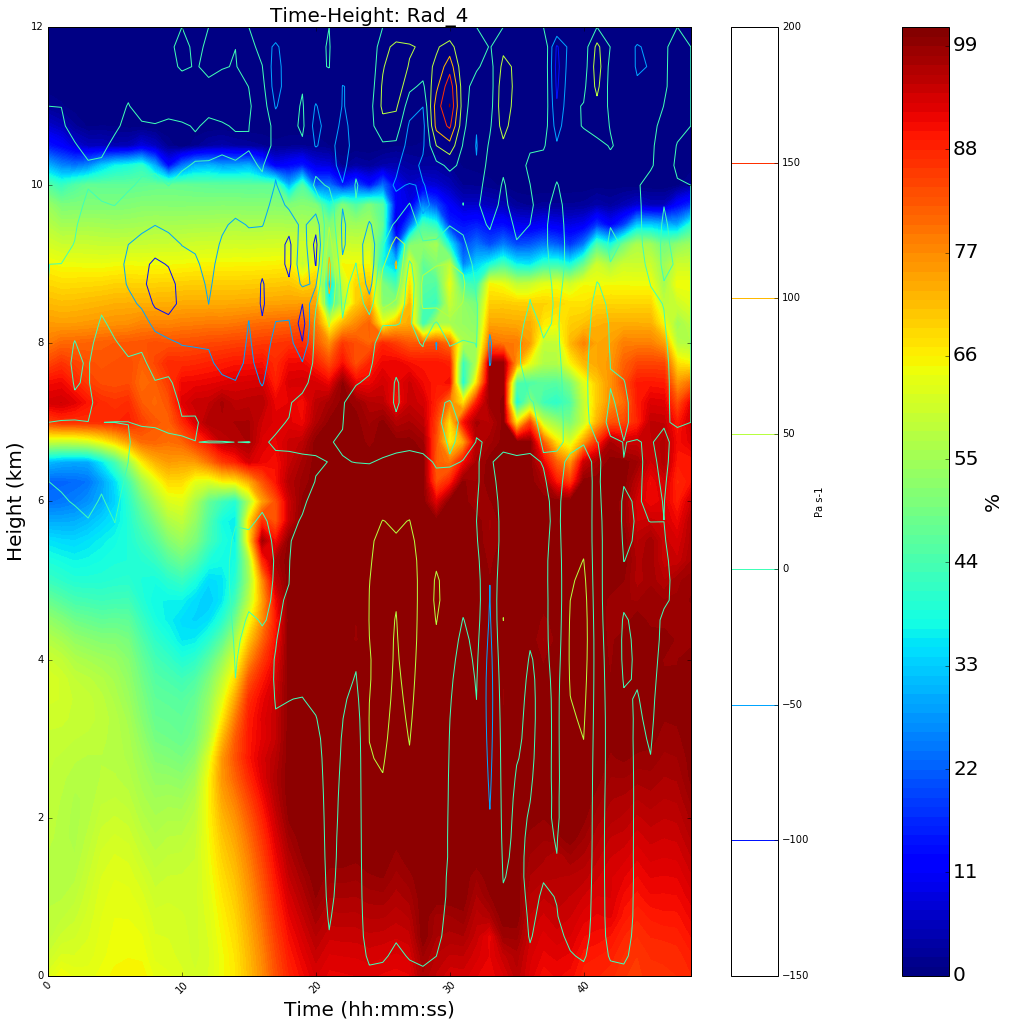

In [25]:
#Zach's Code


P_3D = P[:,:,index[0],index[1]]/100
T_3D = T[:,:,index[0],index[1]]
Q_3D = Q[:,:,index[0],index[1]]

THETA_3D = wrf_theta(T_3D)
TEMP_3D = wrf_temp(THETA_3D,P_3D)

#### Calculate 3D RH
RH2_3D = wrf_rh(TEMP_3D,P_3D,Q_3D)
#print(RH2_3D)


#print(RH2_3D[:,:,0,0].transpose())
W = wrfdata['W'] 
#print(W.shape)
W_3D = W[:,0:49,index[0],index[1]]
#print(W_3D.shape)

R = 287.04 
g = 9.81
rho = -1 * (P_3D)/R*T_3D
#print(temp[:,:,0,0].shape)
omega = numpy.zeros((49,49))
for i in range(0,48):
      for j in range(0,48):
            
            omega[i,j]= (rho[i,j,0,0] * W_3D[i,j,0,0] * g) 

print(np.amax(omega))
print(np.amin(omega))
#print(omega.shape)

#level = [-.75,-.5,-0.25,0,.05,.2,.35,.5,.65,.8,.95,1.1,1.25,1.4,1.55,1.7]

level = [-150,-100,-50,0,50,100,150,200]
plt.figure(figsize=(18,17))
plt.contourf(np.arange(0,49),np.arange(0.,12.25,.25),RH2_3D[:,:,0,0].transpose(),levels=np.arange(102.))
cb = plt.colorbar(orientation='vertical',label = '%')
font_size = 20 # Adjust as appropriate.
cb.ax.tick_params(labelsize=font_size)
cb.set_label("%", size=20)
plt.xticks(rotation =45)
plt.title('Time-Height: Rad_4',fontsize=20)
plt.xlabel('Time (hh:mm:ss)',fontsize=20)
plt.ylabel('Height (km)',fontsize=20)
#plt.contour(W_3D.XTIME.values,np.arange(0.,12.25,.25),W_3D[:,:,0,0].transpose(),levels=level) #levels=np.arange(10.))
plt.contour(np.arange(0,49),np.arange(0.,12.25,.25),omega.transpose(),levels=level, inline=True, fontsize=12) 
cb = plt.colorbar(orientation='vertical',label = 'Pa s-1')
font_size = 30 # Adjust as appropriate.

#plt.barbs(T_3D.XTIME.values,np.arange(0.,12.25,.25),U_unstag[0:49,:,0],V_unstag[0:49,:,0],length=8, pivot='middle')

plt.barbs(np.arange(0,49),
np.arange(0.,12.25,.25),
np.squeeze(U_unstag[:,:,index[0],index[1]]*1.94384),
np.squeeze(V_unstag[:,:,index[0],index[1]]*1.94384),
sizes=dict(emptybarb=0.1, spacing=0.2, height=0.3),length=7)

In [15]:
np.shape(wrfdata['XLONG'].values[i,::5,::5])

(20, 20)

In [16]:
np.shape(U_unstag[i,:,::5,::5])

(49, 20, 20)

In [18]:
np.shape(U_unstag)

(49, 49, 99, 99)

In [19]:
wrfdata['U']

<xarray.DataArray 'U' (Time: 49, bottom_top: 49, south_north: 99, west_east_stag: 100)>
array([[[[  2.62057245e-01,   4.08144891e-01,   5.48826754e-01, ...,
           -1.01613200e+00,  -6.66679978e-01,  -6.01228118e-01],
         [  7.64544355e-03,   7.09610730e-02,   1.44481540e-01, ...,
           -1.05848110e+00,  -6.55040383e-01,  -5.01609564e-01],
         [ -7.81123757e-01,  -6.46618903e-01,  -3.91718209e-01, ...,
           -1.70497024e+00,  -9.39261794e-01,  -5.55721223e-01],
         ..., 
         [  1.64503098e+00,   1.55573475e+00,   1.47577906e+00, ...,
           -3.63617730e+00,  -3.60978985e+00,  -3.51283717e+00],
         [  1.85214341e+00,   1.73813105e+00,   1.63614905e+00, ...,
           -3.47609282e+00,  -3.47848082e+00,  -3.42815900e+00],
         [  2.10956144e+00,   1.94080329e+00,   1.77015460e+00, ...,
           -3.29451275e+00,  -3.26523042e+00,  -3.23218942e+00]],

        [[  1.38150081e-01,   2.57819295e-01,   3.79865199e-01, ...,
           -9.75096405

In [22]:
np.shape(V_unstag[:,:,index[0],index[1]])

(49, 49, 1)